<a href="https://colab.research.google.com/github/yenlung/Deep-Learning-Basics/blob/master/colab02CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

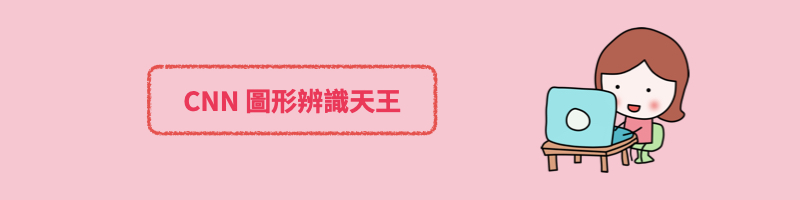

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

### 1. 讀入 MNSIT 數據集

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### 2. 資料整理

#### Channel

CNN 要注意一張圖有多少個 channel, 開始我們因為只有灰階, 所以只有一個 channel。因此我們要轉一下我們的資料格式:

    (28,28) --> (28, 28, 1)

In [5]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255

In [6]:
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 3. step 1: 打造函數學習機 (CNN)

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(16, (3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Conv2D(32, (3,3), padding='same',
                activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Conv2D(64, (3,3), padding='same',
                activation='relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(54, activation='relu'))

In [17]:
model.add(Dense(10, activation='softmax'))

#### 看一下我們的神經網路

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

#### 組裝

In [20]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087),
             metrics=['accuracy'])

### 4. step 2: fit

In [21]:
model.fit(x_train, y_train, batch_size=128, epochs=12)

Epoch 1/12
469/469 [==============================] - 33s 4ms/step - loss: 0.0894 - accuracy: 0.2382
Epoch 2/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0875 - accuracy: 0.4371
Epoch 3/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0716 - accuracy: 0.5208
Epoch 4/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0308 - accuracy: 0.8058
Epoch 5/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0174 - accuracy: 0.8868
Epoch 6/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0131 - accuracy: 0.9154
Epoch 7/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0109 - accuracy: 0.9302
Epoch 8/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0095 - accuracy: 0.9395
Epoch 9/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0085 - accuracy: 0.9460
Epoch 10/12
469/469 [==============================] - 2s 4ms/step - loss: 0.0077 - accuracy: 0.950

### 5. Step 3: 預測

In [22]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

#### 看看測試資料表現如何

In [23]:
loss, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0058 - accuracy: 0.9605


In [24]:
print(f'測試資料的正確率為 {acc*100:.2f}%')

測試資料的正確率為 96.05%


In [25]:
def my_predict(n):
    print('我可愛的 CNN 預測是', y_predict[n])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')

In [26]:
from ipywidgets import interact_manual

In [27]:
interact_manual(my_predict, n=(0, 9999));

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

### 6. 把我們的 model 存起來

In [28]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [30]:
model.save('my_cnn_model')

INFO:tensorflow:Assets written to: my_cnn_model/assets
